# Stock Changes and Covid Cases
#### Joseph Mirto

## Abstract

#### Abstract overview of the notebook

In December of 2019 a new contagious disease called Coronavirus 2019 **(COVID-19)** was idenified in Wuhan, China. On January 22nd of 2020, the United States saw it's first case of the newly identified disease. This disease quickly became a world-wide pandemic, sending many countries into nation-wide quarantine, including the United States. With mass quarantine in effect, daily life was altered greatly. For example, a majority of companies switched to having employees work remotely from home, causing a massive demand for online meeting services. With this shift in demand for online services came massive changes in stock prices. To analyze what sort of impact COVID-19 is having, the stock data of top online-service companies will be coupled with U.S. COVID-19 data. This analysis can hopefully guide future market initiatives and decisions.

## Data Source

The COVID-19 data is pulled from Our World In Data's project.
url: https://github.com/owid/covid-19-data/tree/master/public/data

Chosen companies inspiried by:
url: https://www.kiplinger.com/investing/601008/work-from-home-stocks

### Importing Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import plotly.graph_objects as go
import scipy.stats as ss
from tabulate import tabulate

### Importing the data

In [2]:
Covid_data = pd.read_csv(r'C:\Users\Owner\Desktop\Owid_US_Data.csv')
Stock_data = pd.read_csv(r'C:\Users\Owner\Desktop\Stock_Data.csv')

### Preliminary view of the data

In [3]:
Covid_data.head(10)

,iso_code,continent,location,Date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,total_vaccinations,stringency_index
0,USA,North America,United States,1/22/2020,1,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,USA,North America,United States,1/23/2020,1,0.0,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,USA,North America,United States,1/24/2020,2,1.0,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,USA,North America,United States,1/25/2020,2,0.0,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,USA,North America,United States,1/26/2020,5,3.0,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,USA,North America,United States,1/27/2020,5,0.0,NaN,NaN,0.015,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,USA,North America,United States,1/28/2020,5,0.0,NaN,NaN,0.015,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,USA,North America,United States,1/29/2020,6,1.0,NaN,NaN,0.018,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,USA,North America,United States,1/30/2020,6,0.0,NaN,NaN,0.018,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,USA,North America,United States,1/31/2020,8,2.0,NaN,NaN,0.024,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
Stock_data.head()

,Date,Zoom,TELEDOC,Slack,Chegg,CrowdStrike,Atlassian,Akami,Dropbox,Roku,Take Two,Peloton,Chewy,Microsoft,Amazon,Paypal,Docusign
0,1/2/2020,68.72,83.26,23.02,39.03,49.44,122.88,87.64,18.09,137.10,122.08,29.74,29.62,160.62,1898.01,110.75,75.90
1,1/3/2020,67.28,82.96,22.46,38.31,50.75,123.04,87.24,18.00,137.51,122.21,30.60,29.34,158.62,1874.97,108.76,75.56
2,1/6/2020,70.32,86.94,23.52,38.88,55.11,127.69,87.55,18.53,143.37,124.69,29.75,29.37,159.03,1902.88,110.17,75.39
3,1/7/2020,71.90,85.73,23.83,39.44,54.75,128.15,90.20,18.53,138.19,125.51,30.40,29.20,157.58,1906.86,109.67,75.24
4,1/8/2020,72.55,86.22,23.77,40.10,55.66,130.06,91.40,18.46,134.64,127.82,29.65,28.62,160.09,1891.97,111.82,76.27


### First-look Visual

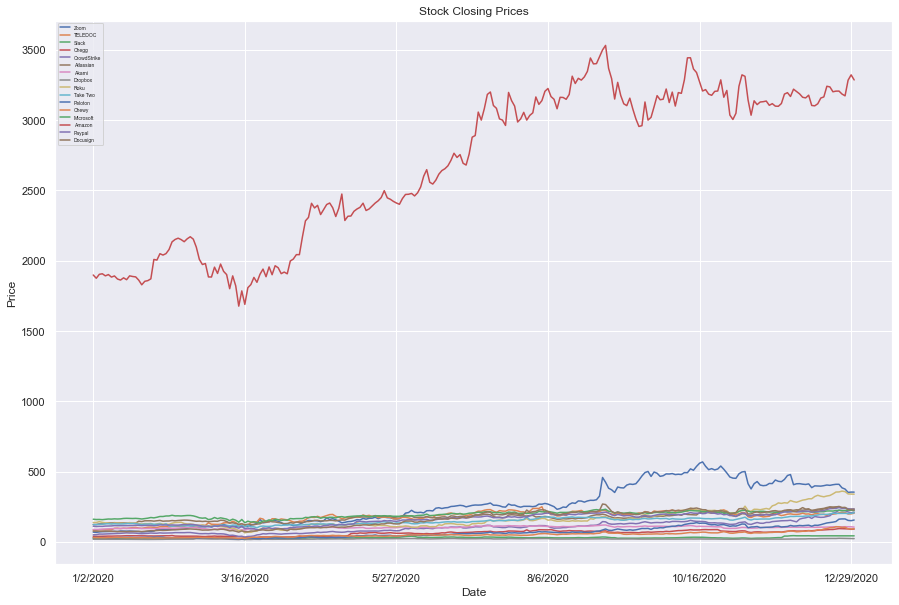

In [5]:
sns.set()
Stock_data.plot(x='Date', ylabel='Price', kind='line', figsize=(15,10), title='Stock Closing Prices')
plt.legend(loc='upper left', prop={'size': 5})

### Momentarily removing Amazon

I'm going to drop Amazon momentarily to provide a better look at the other stocks.

In [7]:
stock_drop = Stock_data.drop(columns=['Amazon'])

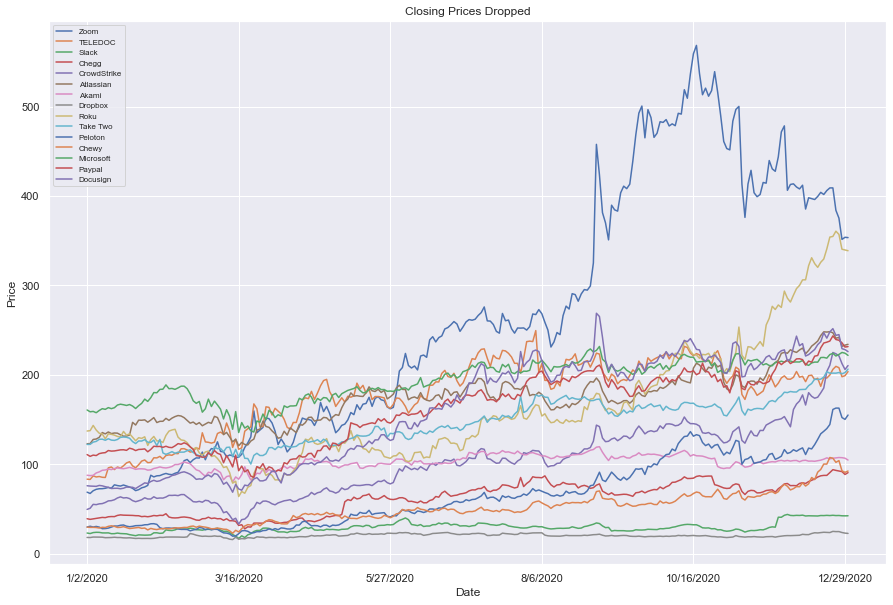

In [8]:
sns.set()
stock_drop.plot(x='Date', ylabel='Price', kind='line', figsize=(15,10), title='Closing Prices Dropped')
plt.legend(loc='upper left', prop={'size': 8})

## Normalizing Data

With Amazon being drastically higher in price relative to other companies, it will be beneficial to normalize all the data. To normalize the data, I will be calculating percent change for each relative to day 1.

In [11]:
Stock_data['Amazon_p'] = round(( (Stock_data['Amazon'] - Stock_data['Amazon'].iloc[0]) / Stock_data['Amazon'].iloc[0] )*100, 4)
Stock_data['Zoom_p'] = round(( (Stock_data['Zoom'] - Stock_data['Zoom'].iloc[0]) / Stock_data['Zoom'].iloc[0] )*100, 4)
Stock_data['TELEDOC_p'] = round(( (Stock_data['TELEDOC'] - Stock_data['TELEDOC'].iloc[0]) / Stock_data['TELEDOC'].iloc[0] )*100, 4)
Stock_data['Slack_p'] = round(( (Stock_data['Slack'] - Stock_data['Slack'].iloc[0]) / Stock_data['Slack'].iloc[0] )*100, 4)
Stock_data['Chegg_p'] = round(( (Stock_data['Chegg'] - Stock_data['Chegg'].iloc[0]) / Stock_data['Chegg'].iloc[0] )*100, 4)
Stock_data['CrowdStrike_p'] = round(( (Stock_data['CrowdStrike'] - Stock_data['CrowdStrike'].iloc[0]) / Stock_data['CrowdStrike'].iloc[0] )*100, 4)
Stock_data['Atlassian_p'] = round(( (Stock_data['Atlassian'] - Stock_data['Atlassian'].iloc[0]) / Stock_data['Atlassian'].iloc[0] )*100, 4)
Stock_data['Akami_p'] = round(( (Stock_data['Akami'] - Stock_data['Akami'].iloc[0]) / Stock_data['Akami'].iloc[0] )*100, 4)
Stock_data['Dropbox_p'] = round(( (Stock_data['Dropbox'] - Stock_data['Dropbox'].iloc[0]) / Stock_data['Dropbox'].iloc[0] )*100, 4)
Stock_data['Roku_p'] = round(( (Stock_data['Roku'] - Stock_data['Roku'].iloc[0]) / Stock_data['Roku'].iloc[0] )*100, 4)
Stock_data['Take Two_p'] = round(( (Stock_data['Take Two'] - Stock_data['Take Two'].iloc[0]) / Stock_data['Take Two'].iloc[0] )*100, 4)
Stock_data['Peloton_p'] = round(( (Stock_data['Peloton'] - Stock_data['Peloton'].iloc[0]) / Stock_data['Peloton'].iloc[0] )*100, 4)
Stock_data['Chewy_p'] = round(( (Stock_data['Chewy'] - Stock_data['Chewy'].iloc[0]) / Stock_data['Chewy'].iloc[0] )*100, 4)
Stock_data['Microsoft_p'] = round(( (Stock_data['Microsoft'] - Stock_data['Microsoft'].iloc[0]) / Stock_data['Microsoft'].iloc[0] )*100, 4)
Stock_data['Paypal_p'] = round(( (Stock_data['Paypal'] - Stock_data['Paypal'].iloc[0]) / Stock_data['Paypal'].iloc[0] )*100, 4)
Stock_data['Docusign_p'] = round(( (Stock_data['Docusign'] - Stock_data['Docusign'].iloc[0]) / Stock_data['Docusign'].iloc[0] )*100, 4)

In [13]:
Max_table = Stock_data[['Amazon_p', 'Zoom_p','TELEDOC_p','Slack_p','Chegg_p','CrowdStrike_p','Atlassian_p',
'Akami_p','Dropbox_p','Roku_p','Take Two_p','Peloton_p','Chewy_p','Microsoft_p',
'Paypal_p','Docusign_p']]

Max_table.head(10)

,Amazon_p,Zoom_p,TELEDOC_p,Slack_p,Chegg_p,CrowdStrike_p,Atlassian_p,Akami_p,Dropbox_p,Roku_p,Take Two_p,Peloton_p,Chewy_p,Microsoft_p,Paypal_p,Docusign_p
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,-1.2139,-2.0955,-0.3603,-2.4327,-1.8447,2.6497,0.1302,-0.4564,-0.4975,0.2991,0.1065,2.8917,-0.9453,-1.2452,-1.7968,-0.4480
2,0.2566,2.3283,4.4199,2.1720,-0.3843,11.4684,3.9144,-0.1027,2.4323,4.5733,2.1379,0.0336,-0.8440,-0.9899,-0.5237,-0.6719
3,0.4663,4.6275,2.9666,3.5187,1.0505,10.7403,4.2887,2.9210,2.4323,0.7950,2.8096,2.2192,-1.4180,-1.8927,-0.9752,-0.8696
4,-0.3182,5.5733,3.5551,3.2580,2.7415,12.5809,5.8431,4.2903,2.0453,-1.7943,4.7018,-0.3026,-3.3761,-0.3300,0.9661,0.4875
5,0.1602,5.6752,2.5342,0.6516,3.7407,13.1472,10.1969,6.3327,1.5478,-2.4143,4.8657,-6.2878,-0.6415,0.9152,1.6433,-0.1318
6,-0.7824,6.3591,2.2820,0.4344,3.1002,15.6958,8.9681,6.7207,-1.4925,-6.3457,3.8336,-5.8171,-1.3167,0.4483,1.9684,-1.4097
7,-0.3535,7.7270,15.2654,0.7819,5.5854,19.2759,10.7340,8.0329,-1.2714,-2.3122,5.2179,-4.0686,3.0385,1.6561,4.0903,-2.3057
8,-1.5053,6.4610,16.3464,-3.2146,6.2260,19.8220,9.2285,7.1771,-0.4422,-2.6842,3.9728,-0.1681,5.0979,0.9401,3.5124,-4.0843
9,-1.8962,11.9616,12.8994,-2.9974,6.0210,21.8649,9.7900,8.5349,1.2161,-3.3552,3.7107,3.7660,2.9710,1.5938,3.7020,-3.7813


Now that the numbers are normalized, it is much easier and more fair to make direct comparisons.

### Checking and ranking percent change maxes

In [15]:
maxes = ([86.0607, 727.0373, 199.5676, 90.4431, 140.5585, 354.8948, 101.9775, 
              36.4331, 37.4793, 162.9905, 69.0285, 447.2764, 262.8967, 44.2224, 119.8555, 254.1502])

maxes = sorted(maxes)

ranks = ss.rankdata(maxes)

print(tabulate([['1', 'Zoom', '727.0373'], ['2', 'Peloton', '447.2764'], ['3', 'CrowdStrike', '354.8948'], 
               ['4', 'Chewy', '262.8967'], ['5', 'Docusign', '254.1502'], ['6', 'TELEDOC', '199.5674'], 
               ['7', 'Roku', '162.9905'], ['8', 'Chegg', '140.5585'], ['9', 'Paypal', '119.8555'], 
               ['10', 'Atlassian', '101.9775'], ['11', 'Slack', '90.4431'],['12', 'Amazon', '86.0607'], 
               ['13', 'Take Two', '69.0285'], ['14', 'Microsoft', '44.2224'], ['15', 'Dropbox', '37.4793'], 
                ['16', 'Akami', '36.4331']], headers=['Rank', 'Company', 'Max Percent Change'], tablefmt='orgtbl'))

|   Rank | Company     |   Max Percent Change |
|--------+-------------+----------------------|
|      1 | Zoom        |             727.037  |
|      2 | Peloton     |             447.276  |
|      3 | CrowdStrike |             354.895  |
|      4 | Chewy       |             262.897  |
|      5 | Docusign    |             254.15   |
|      6 | TELEDOC     |             199.567  |
|      7 | Roku        |             162.99   |
|      8 | Chegg       |             140.559  |
|      9 | Paypal      |             119.856  |
|     10 | Atlassian   |             101.978  |
|     11 | Slack       |              90.4431 |
|     12 | Amazon      |              86.0607 |
|     13 | Take Two    |              69.0285 |
|     14 | Microsoft   |              44.2224 |
|     15 | Dropbox     |              37.4793 |
|     16 | Akami       |              36.4331 |


Unsurprisingly, Zoom saw a monumental change in stock price relative to it's beginning price at the beginning of the pandemic. This is not unexpected considering the massive shift in labor being done from home. Peloton and Crowdstrike also saw extreme numbers in  percent change. Considering the extended quarantine, Peoloton might have seen a higher number of sales during the holidays.

### Previous Graphs With Normalized Data

<AxesSubplot:title={'center':'Stock Price Percent Change'}, xlabel='Date', ylabel='Percent Change'>

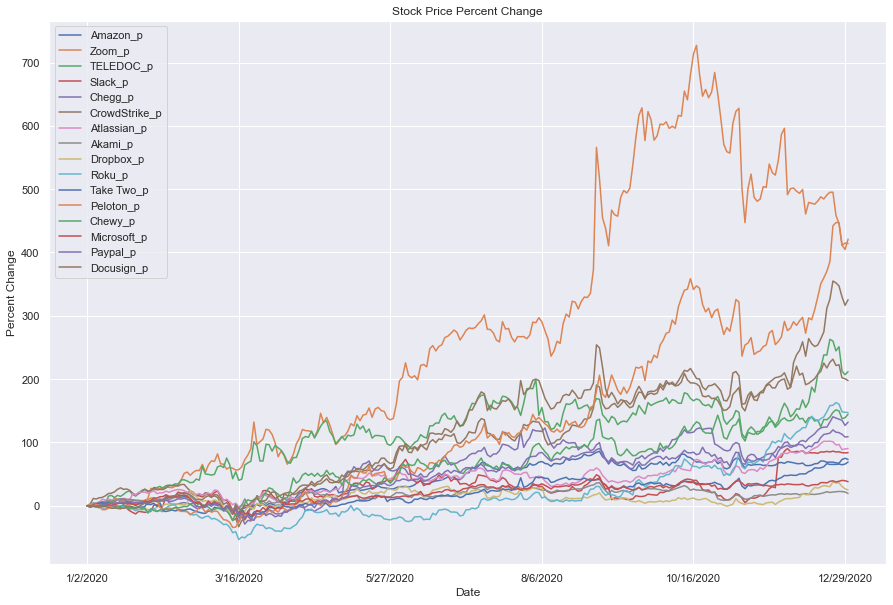

In [16]:
Pc_columns = Stock_data[['Date', 'Amazon_p', 'Zoom_p','TELEDOC_p','Slack_p','Chegg_p','CrowdStrike_p',
'Atlassian_p','Akami_p','Dropbox_p','Roku_p','Take Two_p','Peloton_p',
'Chewy_p','Microsoft_p','Paypal_p','Docusign_p']]

sns.set()
Pc_columns.plot(x='Date', ylabel='Percent Change', kind='line', figsize=(15,10), title='Stock Price Percent Change')

Using the same type of plot, but with the normalized data, does a much better job of putting things into perspective. What is interesting to note is the downward trend of Zoom toward the end of the year.

<AxesSubplot:title={'center':'Stock Drop Boxplot'}, ylabel='Percent Change'>

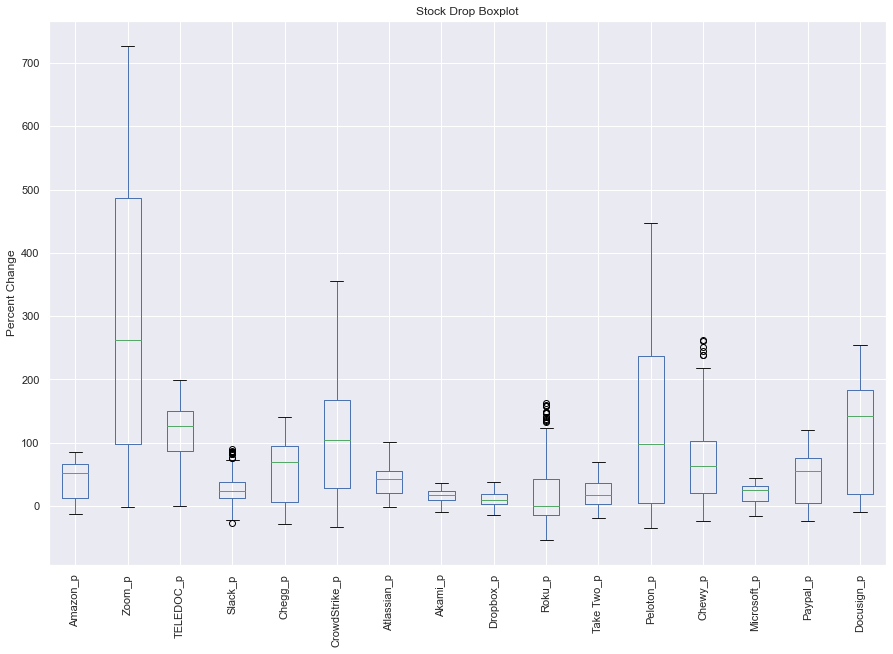

In [17]:
Pc_columns.plot(kind='box', ylabel='Percent Change', figsize=(15,10), title='Stock Drop Boxplot', rot=90)

### Merging The Two Data Frames
After gaining some insights of just the stock data, now is a good time to merge the Covid data.

In [21]:
left = Stock_data
right = Covid_data

joined = left.merge(right, on='Date', how='left')

### Creating A Dual Axis Graph

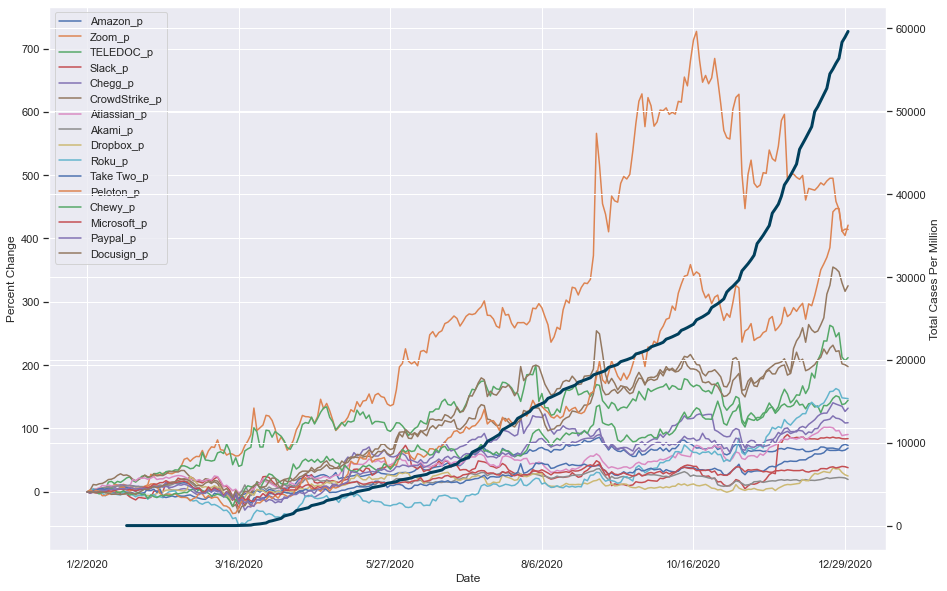

In [23]:
Pchange = joined[['Amazon_p', 'Zoom_p','TELEDOC_p','Slack_p','Chegg_p','CrowdStrike_p','Atlassian_p',
'Akami_p','Dropbox_p','Roku_p','Take Two_p','Peloton_p','Chewy_p',
'Microsoft_p','Paypal_p','Docusign_p']]


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(joined.Date, joined[['Amazon_p', 'Zoom_p','TELEDOC_p','Slack_p','Chegg_p',
'CrowdStrike_p','Atlassian_p','Akami_p','Dropbox_p','Roku_p','Take Two_p','Peloton_p',
'Chewy_p','Microsoft_p','Paypal_p','Docusign_p']])

ax.set_xlabel('Date')
ax.set_ylabel('Percent Change')
plt.legend(Pchange)
ax2 = ax.twinx()
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.plot(joined.Date, joined.total_cases_per_million, linewidth=3.0, color="#003f5c")
ax2.set_ylabel('Total Cases Per Million')

plt.show()

### Observations

Viewing the graph at a glance, a majority of companies saw some form of coralation between it's stock price percent change and the amount of total cases. Peloton, Crowdstrike, and Chewy are the companies that closely followed the expoential rise in case numbers between the 11th and 12th month period.

### Measuring correlation

In [24]:
joined_variables = joined[['Amazon_p', 'Zoom_p','TELEDOC_p','Slack_p','Chegg_p','CrowdStrike_p','Atlassian_p',
'Akami_p','Dropbox_p','Roku_p','Take Two_p','Peloton_p','Chewy_p','Microsoft_p','Paypal_p','Docusign_p', 'total_cases']]

join_cor = joined_variables.corr()
join_cor = join_cor.sort_values('total_cases', ascending='False')
join_cor['total_cases'].head(16)

Dropbox_p        0.298420
Akami_p          0.406823
TELEDOC_p        0.546769
Slack_p          0.645766
Microsoft_p      0.750754
Amazon_p         0.752346
Chegg_p          0.768418
Zoom_p           0.792969
Docusign_p       0.811518
Paypal_p         0.857752
Atlassian_p      0.879336
Take Two_p       0.896472
Peloton_p        0.935204
CrowdStrike_p    0.945234
Chewy_p          0.947368
Roku_p           0.970266
Name: total_cases, dtype: float64

Interestinly, Roku and Chewy have the highest cor values in the first pass through. Pelaton and Crowdstrike, two stocks previously mentioned, both share a high cor value. Zoom however has a slightly lower cor value. This could be due to the drop off at the end of the year.

### Creating first pass through heat map

<AxesSubplot:>

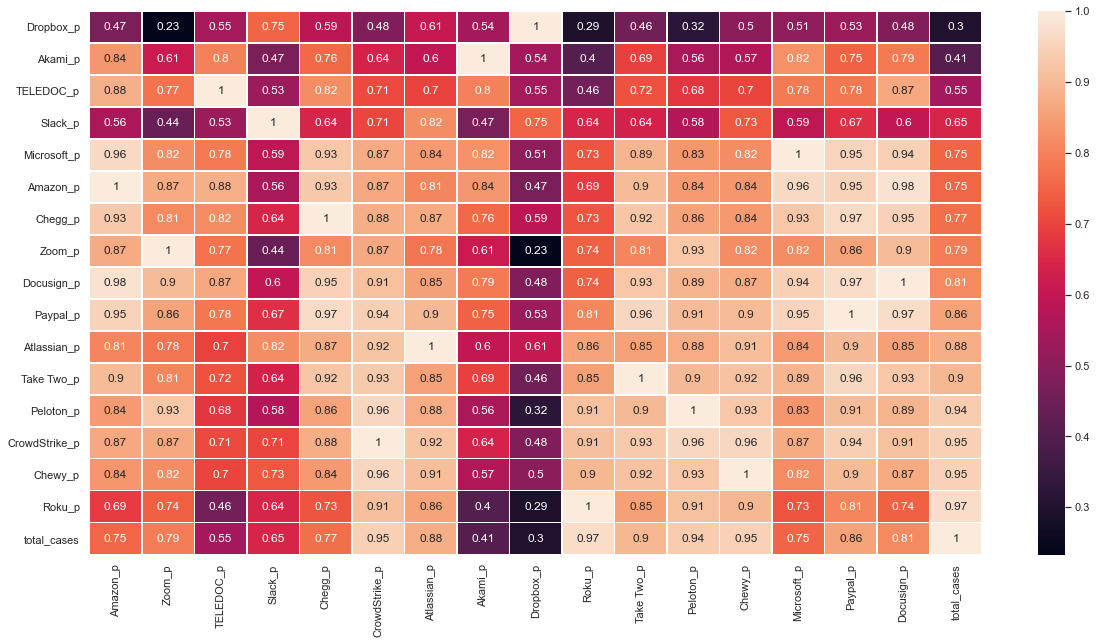

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(join_cor, annot=True, linewidths=0.5)

The first heat map is fairly large. Creating a cut-off threshold to condense this might be useful.

### Visualizing a threshold

               total_cases
Dropbox_p         0.298420
Akami_p           0.406823
TELEDOC_p         0.546769
Slack_p           0.645766
Microsoft_p       0.750754
Amazon_p          0.752346
Chegg_p           0.768418
Zoom_p            0.792969
Docusign_p        0.811518
Paypal_p          0.857752
Atlassian_p       0.879336
Take Two_p        0.896472
Peloton_p         0.935204
CrowdStrike_p     0.945234
Chewy_p           0.947368
Roku_p            0.970266


<BarContainer object of 16 artists>

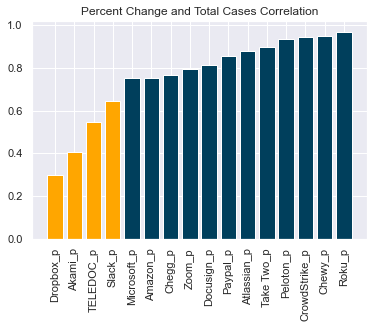

In [26]:
total_cases_cor = join_cor[['total_cases']]
total_cases_cor = total_cases_cor.drop(['total_cases'])
total_cases_cor = total_cases_cor.sort_values('total_cases', ascending='False')
print(total_cases_cor)
cor_values = total_cases_cor.values
index_labels = total_cases_cor.index
list1 = np.concatenate( total_cases_cor.values, axis=0 )

col = [] 

for i in range(0, len(cor_values)): 
    if cor_values[i]<=0.70: 
        col.append('#ffa600')   
    else: 
        col.append('#003f5c')  
  
for i in range(len([cor_values])): 
    
    plt.xticks(rotation=90)
plt.title('Percent Change and Total Cases Correlation')
plt.bar(index_labels, list1, color=col)

Setting a threshold of .70 allows us to drop 4 companies which saw a fairly weak corr value. These companies are Dropbox, Akami, TELEDOC, and Slack.

### Dropping weak corr values

In [27]:
drop_variables = joined[['Amazon_p', 'Zoom_p','Chegg_p','CrowdStrike_p','Atlassian_p',
                         'Roku_p','Take Two_p','Peloton_p','Chewy_p','Microsoft_p','Paypal_p','Docusign_p', 'total_cases']]

drop_cor = drop_variables.corr()
drop_cor = drop_cor.sort_values('total_cases', ascending='False')
drop_cor['total_cases'].head(12)

Microsoft_p      0.750754
Amazon_p         0.752346
Chegg_p          0.768418
Zoom_p           0.792969
Docusign_p       0.811518
Paypal_p         0.857752
Atlassian_p      0.879336
Take Two_p       0.896472
Peloton_p        0.935204
CrowdStrike_p    0.945234
Chewy_p          0.947368
Roku_p           0.970266
Name: total_cases, dtype: float64

With the bottom four taken out, the new numbers can be used to consolidate which companies are most significant.

<AxesSubplot:>

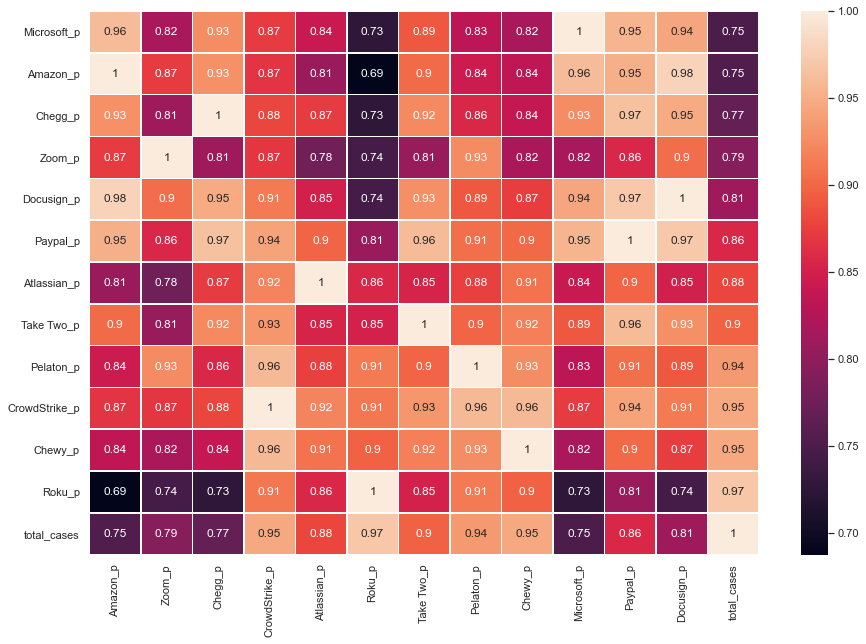

In [28]:
plt.figure(figsize = (15,10))
sns.heatmap(drop_cor, annot=True, linewidths=0.5)

### Insights

Firstly, Zoom, the company which saw the largest percent change, again has a fairly weak correlation to total number of cases. Additionally, Zoom has a fairly weak correlation to other companies' stock.

The companies with the highest correlation to total cases, Roku, Chewy, Peloton, and CrowdStrike, also share a fairly strong correlation between each other.

Using the final row "total_cases", it seems what strongly correlated to total_cases were companies invovled in life style. Personal exercise, home pet and home entertainment all share a this at home life style. Interesting to note is the CrowdStrike stock. CrowdStrike's numbers could be reason to delve deeper into a look of how cyber security played out during the pandemic.

In [28]:
drop_2_variables = joined[['Atlassian_p','Roku_p','Take Two_p','Peloton_p','Chewy_p','CrowdStrike_p', 'total_cases']]

### Ensuring The Number Are Significant

In [29]:
XVar = drop_variables.drop('total_cases', axis=1)
YVar = drop_variables[['total_cases']]
YVar = YVar.dropna()
XVar = XVar.iloc[13:]
XVar = sm.add_constant(XVar)

#print(YVar.count())
#print(XVar.count())

linearmodel1 = sm.OLS(YVar, XVar).fit()
print(linearmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     894.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.43e-183
Time:                        15:38:24   Log-Likelihood:                -3564.6
No. Observations:                 239   AIC:                             7155.
Df Residuals:                     226   BIC:                             7200.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.748e+06   2.16e+05      8.099

## Conclusion

During a pandemic it seems wise to invest in a portfolio that is diverse in life style companies. Companies which individuals are directly investing into their personal life. For example, Chewy is related to peoples' personal pets, Peloton is related to personal fitness, and so on.

CrowdStrike Cyber secruity seems to be more closely related to something else that is not total cases. I believe CrowdStrike's numbers are more closely related to the amount of companies switch to remote labor.